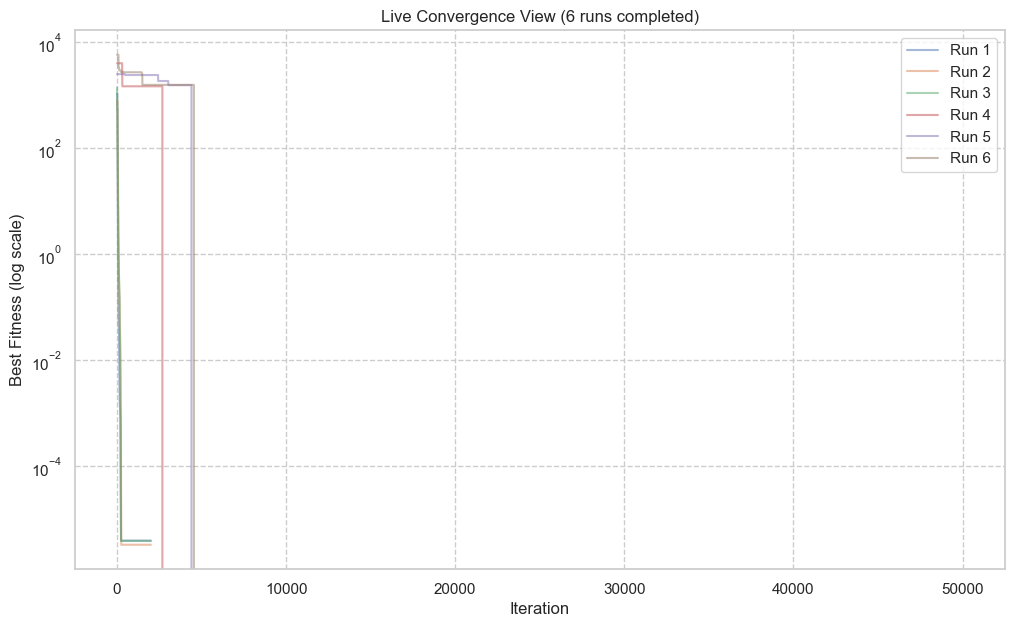

Last updated: 10:55:04
Dashboard stopped.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob # ファイルを検索するためのライブラリ
import time
from IPython.display import display, clear_output

# スタイル設定
sns.set_theme(style="whitegrid")

# 監視対象の履歴フォルダ
# run_experiment.pyで指定したアルゴリズムや問題に合わせて変更してください
history_folder = 'results/histories/hcfwa_SphereFunction_d10'

# このセルを実行し続けると、グラフが自動で更新されます
try:
    while True:
        clear_output(wait=True) # 以前の出力をクリア
        
        # フォルダ内の全CSVファイルのパスを取得
        csv_files = glob.glob(f'{history_folder}/run_*.csv')
        
        if not csv_files:
            print(f"Waiting for data in '{history_folder}'...")
            time.sleep(5) # 5秒待機
            continue

        plt.figure(figsize=(12, 7))
        
        # 見つかった全ての履歴ファイルをプロット
        for i, file_path in enumerate(csv_files):
            df_history = pd.read_csv(file_path)
            # 全ての線が見えるように、透明度(alpha)を少し下げる
            plt.plot(df_history['iteration'], df_history['fitness'], alpha=0.5, label=f'Run {i+1}' if len(csv_files) < 10 else None)
        
        plt.title(f'Live Convergence View ({len(csv_files)} runs completed)')
        plt.xlabel('Iteration')
        plt.ylabel('Best Fitness (log scale)')
        plt.yscale('log')
        plt.grid(True, which="both", ls="--")
        
        # 凡例は多くなりすぎたら表示しない
        if len(csv_files) < 10:
            plt.legend()
            
        display(plt.gcf()) # グラフを表示
        plt.close() # メモリを解放
        
        print(f"Last updated: {time.strftime('%H:%M:%S')}")
        time.sleep(5) # 5秒ごとに更新

except KeyboardInterrupt:
    print("Dashboard stopped.")